In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data,columns = columns ) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
predictions[0:5]

array([ 72.6578568 , 207.59052769, 135.04943429, 241.34030967,
        79.34727423])

Text(0, 0.5, 'Predictions')

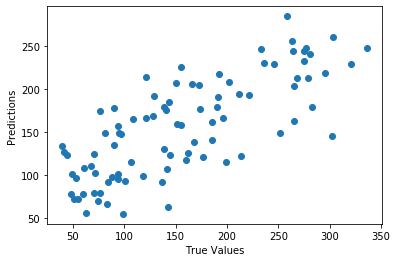

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 52.39945761071668
Train RMSE: 53.883832375614105


# Cross Validation

In [10]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [11]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [12]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [13]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [18]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [19]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df,y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


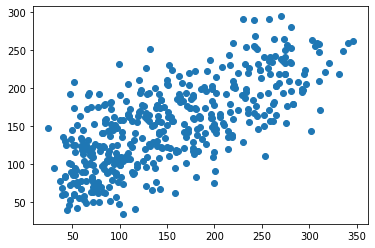

In [88]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)


In [21]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528679

# tasks 

##### Find out cross validation results without using cross_val_predict

In [137]:
from sklearn.model_selection import KFold
kf_new = KFold(n_splits=10)
kf_new.get_n_splits(df)

10

In [151]:
ls=[]
for train_index, test_index in kf_new.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ls.append([X_train, X_test,y_train, y_test])
    #print(train_index,test_index) 


    
    

43

In [161]:
ln = linear_model.LinearRegression()
ls1 = []
for i in range(len(ls)):
    ln.fit(ls[i][0],ls[i][2])
    predict = ln.predict(ls[i][1])
    ls1.extend(predict)   
ls1[:10]


[204.74116866590913,
 66.83256782128534,
 175.6049216258032,
 165.8213155473556,
 128.83457510718318,
 103.05913006224355,
 77.50532133837353,
 125.41897876555,
 161.76534890719145,
 209.59039419984606]

##### Implement cross validation without using sklearn at all

In [162]:
k = int(input())
a = len(df)//k
l1 = []
for i in range(k):  
    if len(df)%k>i:
        Test_index =[*range(i*a,(i+1)*a+1)]
        Train_index = [*range(len(df))]
        for j  in Test_index:
            Train_index.remove(j)
        xTrain, xTest = df.iloc[Train_index],df.iloc[Test_index]
        yTrain, yTest = y[Train_index],y[Test_index] 
        regr = linear_model.LinearRegression()
        model =regr.fit(xTrain, yTrain)
        predict =regr.predict(xTest)
        l1.extend(predict)
        
       
    else:
        Test_index =[*range(i*a,(i+1)*a)]
        Train_index = [*range(len(df))]
        for j  in Test_index:
            Train_index.remove(j)
        xTrain, xTest = df.iloc[Train_index],df.iloc[Test_index]
        yTrain, yTest = y[Train_index],y[Test_index]  
        regr = linear_model.LinearRegression()
        model =regr.fit(xTrain, yTrain)
        predict =regr.predict(xTest)
        l1.extend(predict)
        
l1[:10]
        




10


[204.74116866590913,
 66.83256782128534,
 175.6049216258032,
 165.8213155473556,
 128.83457510718318,
 103.05913006224355,
 77.50532133837353,
 125.41897876555,
 161.76534890719145,
 209.59039419984606]

# Feature Scaling

In [296]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
y = data['Value']
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [297]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [177]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [178]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.172414,0.479167,0.617021,0.173469
1,0.103448,0.312500,0.574468,0.346939
2,0.137931,0.333333,0.510638,0.377551
3,0.241379,0.312500,0.319149,0.214286
4,0.137931,0.250000,0.382979,0.163265
...,...,...,...,...
14320,0.344828,0.604167,0.638298,0.010204
14321,0.172414,0.187500,0.382979,0.316327
14322,0.482759,0.520833,0.489362,0.285714
14323,0.517241,0.354167,0.319149,0.112245


In [179]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.310345,0.520833,0.531915,0.051020
1,0.206897,0.333333,0.468085,0.224490
2,0.241379,0.541667,0.659574,0.132653
3,0.103448,0.416667,0.595745,0.112245
4,0.482759,0.500000,0.468085,0.071429
...,...,...,...,...
3577,0.103448,0.291667,0.553191,0.755102
3578,0.137931,0.270833,0.382979,0.071429
3579,0.241379,0.312500,0.468085,0.265306
3580,0.551724,0.583333,0.553191,0.244898


### Standard Scaler

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [182]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-0.879449,0.396527,0.924269,-0.105069
1,-1.306822,-0.750506,0.598770,0.957199
2,-1.093135,-0.607127,0.110522,1.144658
3,-0.452076,-0.750506,-1.354223,0.144877
4,-1.093135,-1.180644,-0.865975,-0.167555
...,...,...,...,...
14320,0.188984,1.256802,1.087018,-1.104850
14321,-0.879449,-1.610781,-0.865975,0.769740
14322,1.043730,0.683286,-0.052228,0.582281
14323,1.257417,-0.463748,-1.354223,-0.479987


In [183]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-0.024703,0.683286,0.273271,-0.854905
1,-0.665762,-0.607127,-0.214977,0.207363
2,-0.452076,0.826665,1.249768,-0.355014
3,-1.306822,-0.033610,0.761520,-0.479987
4,1.043730,0.539906,-0.214977,-0.729932
...,...,...,...,...
3577,-1.306822,-0.893885,0.436021,3.456654
3578,-1.093135,-1.037265,-0.865975,-0.729932
3579,-0.452076,-0.750506,-0.214977,0.457309
3580,1.471103,1.113423,0.436021,0.332336


# tasks

###### try applying this scalers to any dataset and check the regression results

In [209]:
dr = pd.read_csv('Ecommerce.csv') 
y = dr['Yearly Amount Spent']
dr

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [210]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [211]:
dr = dr.drop(['Email','Address','Avatar'], axis = 1)
dr

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [226]:
X_train, X_test, y_train, y_test = train_test_split((dr[dr.columns.difference(['Yearly Amount Spent'])]), y, test_size=0.2,random_state=5)

In [227]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_predict = regr.predict(X_test)
y_predict


array([559.28329991, 478.50520821, 455.80631643, 538.42873404,
       480.61186059, 506.94174709, 499.47488213, 588.76713744,
       532.20847445, 519.15932732, 523.55702645, 435.6345149 ,
       499.86684312, 461.44268359, 589.75317842, 491.09265277,
       590.83923796, 685.45560631, 432.78197282, 439.97266672,
       389.10869285, 753.58048766, 505.98160795, 566.04431348,
       610.75349415, 421.44845291, 507.44736431, 599.97672337,
       438.26767699, 503.66110085, 451.78829806, 494.95898743,
       598.6323141 , 468.85107574, 423.0081068 , 464.06498575,
       590.92498952, 508.08649348, 467.29111452, 430.5102801 ,
       480.11392447, 417.27315723, 472.45106539, 514.0344006 ,
       464.43420273, 513.04273937, 531.06811235, 575.03731417,
       725.60637221, 411.64013915, 325.16736868, 685.40599957,
       554.52893049, 521.45644252, 431.22825716, 502.66086639,
       543.66728031, 488.44863431, 500.73370539, 584.43849549,
       557.78915843, 512.33803854, 535.30278156, 531.19

In [228]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 7.42
Mean squared error: 95.79
Root mean squared error: 9.79
R-squared: 0.98


In [229]:
norm = MinMaxScaler().fit(X_train)

In [230]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Avg Session Length,Length of Membership,Time on App,Time on Website
0,0.477328,0.689073,0.624040,0.293100
1,0.404439,0.514869,0.600188,0.579456
2,0.381008,0.487686,0.563528,0.769492
3,0.570890,0.611423,0.584745,0.775540
4,0.380702,0.534447,0.600485,0.191586
...,...,...,...,...
95,0.597037,0.526178,0.601301,0.369283
96,0.705988,0.404345,0.683717,0.470292
97,0.613713,0.503955,0.218443,0.518941
98,0.350952,0.510126,0.590860,0.271471


In [234]:
X_train, X_test, y_train, y_test = train_test_split((dr[dr.columns.difference(['Yearly Amount Spent'])]), y, test_size=0.2,random_state=5)

In [235]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_predict = regr.predict(X_test)
y_predict


array([559.28329991, 478.50520821, 455.80631643, 538.42873404,
       480.61186059, 506.94174709, 499.47488213, 588.76713744,
       532.20847445, 519.15932732, 523.55702645, 435.6345149 ,
       499.86684312, 461.44268359, 589.75317842, 491.09265277,
       590.83923796, 685.45560631, 432.78197282, 439.97266672,
       389.10869285, 753.58048766, 505.98160795, 566.04431348,
       610.75349415, 421.44845291, 507.44736431, 599.97672337,
       438.26767699, 503.66110085, 451.78829806, 494.95898743,
       598.6323141 , 468.85107574, 423.0081068 , 464.06498575,
       590.92498952, 508.08649348, 467.29111452, 430.5102801 ,
       480.11392447, 417.27315723, 472.45106539, 514.0344006 ,
       464.43420273, 513.04273937, 531.06811235, 575.03731417,
       725.60637221, 411.64013915, 325.16736868, 685.40599957,
       554.52893049, 521.45644252, 431.22825716, 502.66086639,
       543.66728031, 488.44863431, 500.73370539, 584.43849549,
       557.78915843, 512.33803854, 535.30278156, 531.19

In [236]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 7.42
Mean squared error: 95.79
Root mean squared error: 9.79
R-squared: 0.98


In [237]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler().fit(X_train)
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Avg Session Length,Length of Membership,Time on App,Time on Website
0,1.345549,0.579787,2.125431,0.472875
1,2.803132,-0.096913,-0.323189,-0.172282
2,-0.572281,-0.255342,-1.107247,-0.511082
3,0.391423,-0.744857,-0.152992,-0.179936
4,-1.101549,0.069227,-1.077868,0.275705
...,...,...,...,...
395,0.395593,1.228760,-0.052543,-0.522566
396,-0.855695,-0.198940,0.213983,1.186831
397,0.180993,0.241008,1.481575,-0.639421
398,-0.761262,-0.412717,-1.010783,1.207334


In [238]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_predict = regr.predict(X_test)
y_predict

array([559.28329991, 478.50520821, 455.80631643, 538.42873404,
       480.61186059, 506.94174709, 499.47488213, 588.76713744,
       532.20847445, 519.15932732, 523.55702645, 435.6345149 ,
       499.86684312, 461.44268359, 589.75317842, 491.09265277,
       590.83923796, 685.45560631, 432.78197282, 439.97266672,
       389.10869285, 753.58048766, 505.98160795, 566.04431348,
       610.75349415, 421.44845291, 507.44736431, 599.97672337,
       438.26767699, 503.66110085, 451.78829806, 494.95898743,
       598.6323141 , 468.85107574, 423.0081068 , 464.06498575,
       590.92498952, 508.08649348, 467.29111452, 430.5102801 ,
       480.11392447, 417.27315723, 472.45106539, 514.0344006 ,
       464.43420273, 513.04273937, 531.06811235, 575.03731417,
       725.60637221, 411.64013915, 325.16736868, 685.40599957,
       554.52893049, 521.45644252, 431.22825716, 502.66086639,
       543.66728031, 488.44863431, 500.73370539, 584.43849549,
       557.78915843, 512.33803854, 535.30278156, 531.19

In [239]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 7.42
Mean squared error: 95.79
Root mean squared error: 9.79
R-squared: 0.98


# One Hot Encoding

In [327]:
data = pd.read_csv('regression.csv')
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,€1K,CM,22.0,2019,5'9,134lbs
17903,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,€1K,ST,21.0,2020,6'3,170lbs
17904,B. Worman,16,England,47,67,Cambridge United,60000.0,€1K,ST,33.0,2021,5'8,148lbs
17905,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,€1K,RW,34.0,2019,5'10,154lbs


In [374]:
new_data = pd.get_dummies(data[data.columns.difference(['Name','Nationallity','Weight','Jersey Number'])])
y = new_data['Value']
print(y)
X_train, X_test, y_train, y_test = train_test_split((new_data[new_data.columns.difference(['Value'])]), y, test_size=0.2,random_state=6)
X_test

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
17902        60000.0
17903        60000.0
17904        60000.0
17905        60000.0
17906        60000.0
Name: Value, Length: 17907, dtype: float64


,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Wage_€91K,Wage_€92K,Wage_€93K,Wage_€94K,Wage_€95K,Wage_€96K,Wage_€97K,Wage_€98K,Wage_€99K,Wage_€9K
4300,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2870,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5764,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12693,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7428,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15810,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16674,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [378]:
norm = MinMaxScaler().fit(X_train)
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))


,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Wage_€91K,Wage_€92K,Wage_€93K,Wage_€94K,Wage_€95K,Wage_€96K,Wage_€97K,Wage_€98K,Wage_€99K,Wage_€9K
0,0.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.310345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.310345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.344828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0.586207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3578,0.172414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3579,0.310345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3580,0.068966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_predict = regr.predict(X_test)
y_predict

array([ 2907392.,  7057408., 11863104., ...,  -760896.,    32768.,
        3487616.])

In [381]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 87783271807177.00
Mean squared error: 5056047942956238119563136335872.00
Root mean squared error: 2248565752420026.00
R-squared: -119494652742871232.00


In [ ]:
# karcum em sxal e, qani wor sxal e normalizacvum string parunakogh syuner@